In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Internation_students_Canada.csv')
print(data.shape)
data.head()

(217, 10)


,Country of Citizenship,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,95,115,95,80,95,90,80,170,140
1,Albania,115,165,185,245,375,250,305,345,545
2,Algeria,1060,845,1020,1490,2690,2170,3165,5360,7180
3,Andorra,0,0,0,0,0,0,10,5,0
4,Angola,65,80,40,25,120,30,50,75,65


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country of Citizenship  217 non-null    object
 1   2015                    217 non-null    int64 
 2   2016                    217 non-null    int64 
 3   2017                    217 non-null    int64 
 4   2018                    217 non-null    int64 
 5   2019                    217 non-null    int64 
 6   2020                    217 non-null    int64 
 7   2021                    217 non-null    int64 
 8   2022                    217 non-null    int64 
 9   2023                    217 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 17.1+ KB


In [3]:
data.describe(include='all')

,Country of Citizenship,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,217,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
unique,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1047.649770,1268.917051,1510.967742,1692.741935,1898.986175,1245.668203,2121.059908,2616.036866,2740.414747
std,NaN,5362.640744,6741.540436,8403.593118,9729.000854,11360.882179,7180.221219,12670.061927,16425.316706,15791.033191
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,5.000000,10.000000,10.000000,10.000000,10.000000,5.000000,15.000000,15.000000,20.000000
50%,NaN,85.000000,100.000000,105.000000,105.000000,120.000000,70.000000,135.000000,145.000000,145.000000
75%,NaN,335.000000,420.000000,445.000000,475.000000,540.000000,415.000000,630.000000,665.000000,775.000000


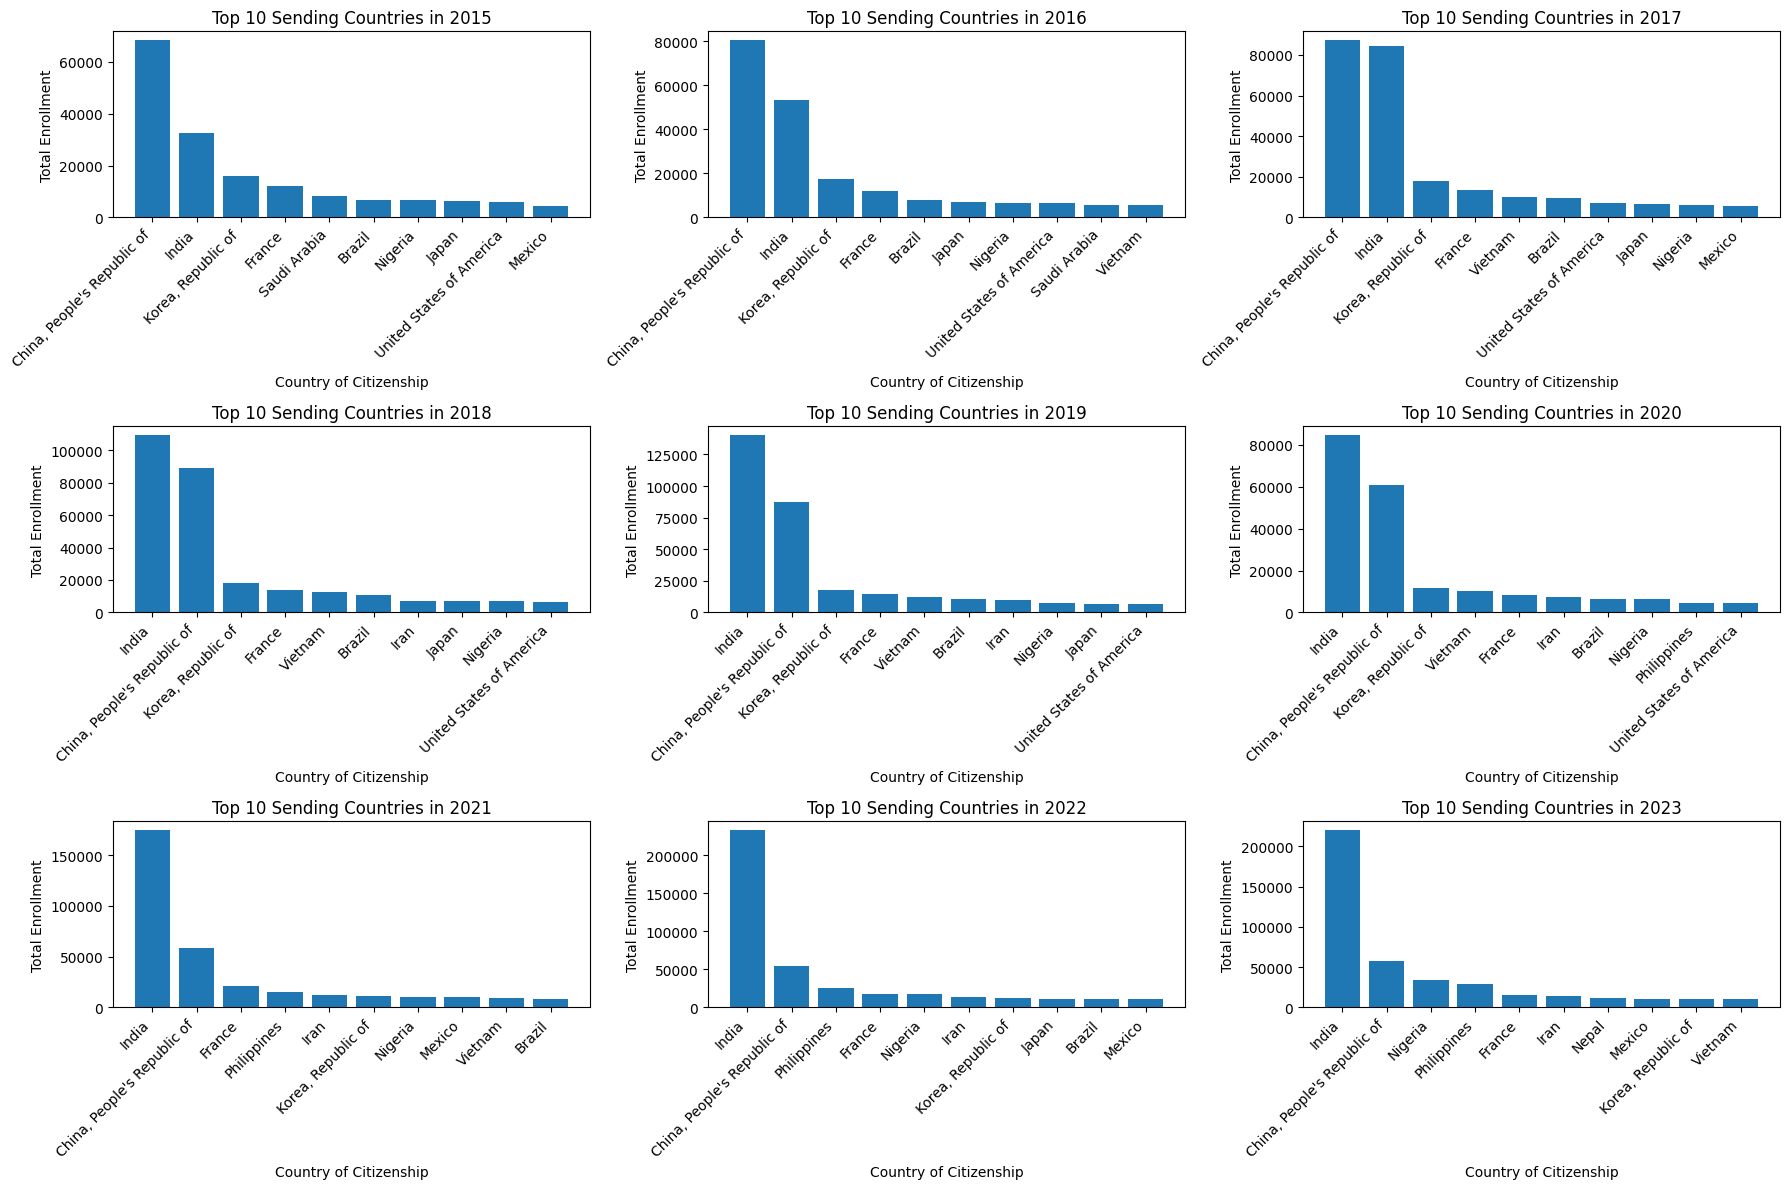

In [4]:
# Loop through each year and plot the top 10 sending countries
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.figure(figsize=(18, 12))  # Adjust figure size

for i, year in enumerate(years, start=1):
    top_countries_year = data[year].sort_values(ascending=False).head(10)
    top_countries_year.index = data['Country of Citizenship'][top_countries_year.index].values

    plt.subplot(3, 3, i)  # Adjust subplot layout
    plt.bar(top_countries_year.index, top_countries_year.values)
    plt.title(f'Top 10 Sending Countries in {year}')
    plt.xlabel('Country of Citizenship')
    plt.ylabel('Total Enrollment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


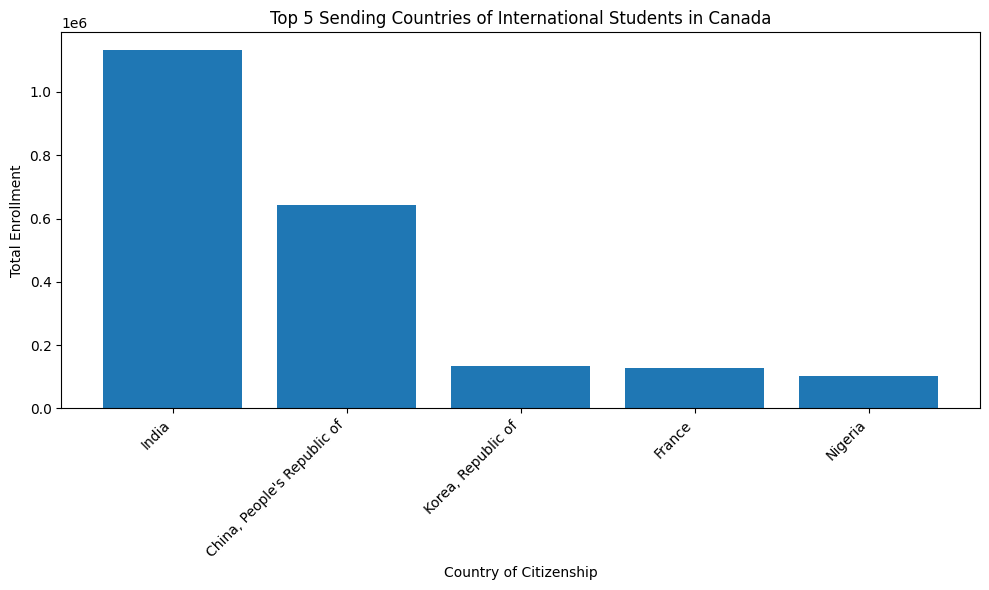

In [5]:
# Group the data by 'Country of Citizenship' and sum the enrollment for each country
enrollment_by_country = data.groupby('Country of Citizenship').sum().reset_index()

# Calculate total enrollment for each country
enrollment_by_country['Total Enrollment'] = enrollment_by_country.iloc[:, 1:].sum(axis=1)

# Set the value of N for the top countries you want to identify
top_n = 5  # Adjust as needed

# Select the top N sending countries with the highest total enrollment
top_sending_countries = enrollment_by_country.nlargest(top_n, 'Total Enrollment')
import matplotlib.pyplot as plt

# Plot bar chart for the top sending countries
plt.figure(figsize=(10, 6))
plt.bar(top_sending_countries['Country of Citizenship'], top_sending_countries['Total Enrollment'])
plt.title(f'Top {top_n} Sending Countries of International Students in Canada')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


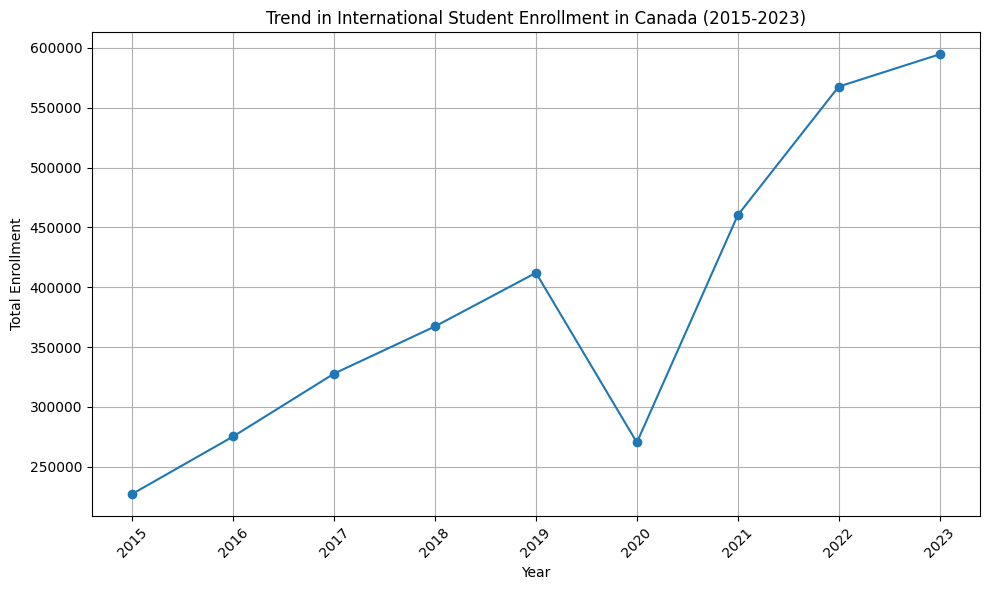

In [6]:
# Update the years list to include all years from 2015 to 2023
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(years, data.iloc[:, 1:].sum(), marker='o')
plt.title('Trend in International Student Enrollment in Canada (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


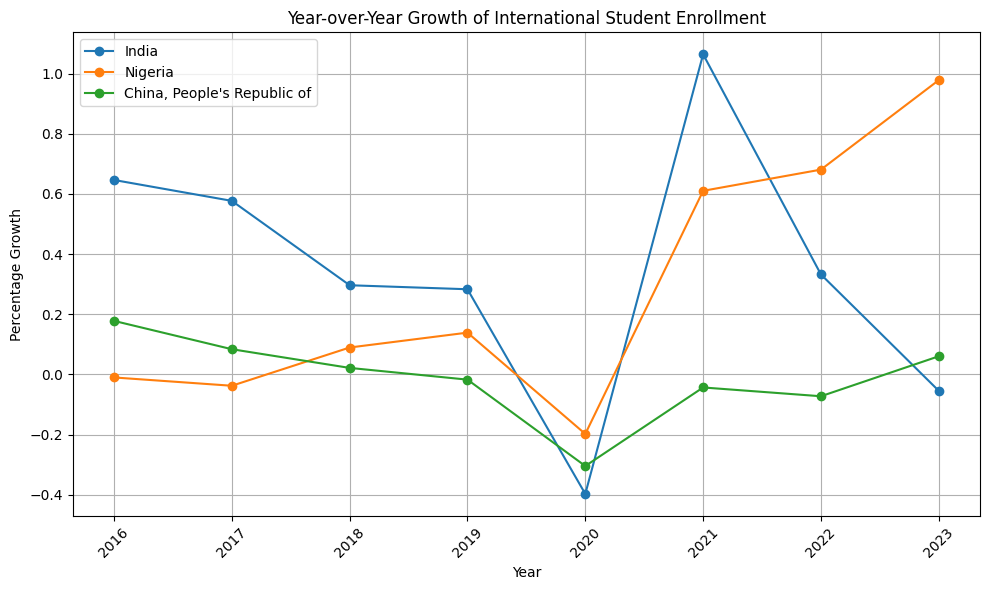

In [9]:
# Calculate the enrollment for each year for each country
enrollment_by_country = data.groupby('Country of Citizenship').sum().reset_index()

# Compute the percentage change in enrollment from the previous year for each country
enrollment_growth = enrollment_by_country.set_index('Country of Citizenship').pct_change(axis=1)

# Select countries for visualization
selected_countries = ['India', 'Nigeria', "China, People's Republic of"]  # Replace with the countries you want to visualize

# Plot the year-over-year growth for selected countries
plt.figure(figsize=(10, 6))
for country in selected_countries:
    plt.plot(enrollment_growth.columns, enrollment_growth.loc[country], label=country, marker='o')

plt.title('Year-over-Year Growth of International Student Enrollment')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

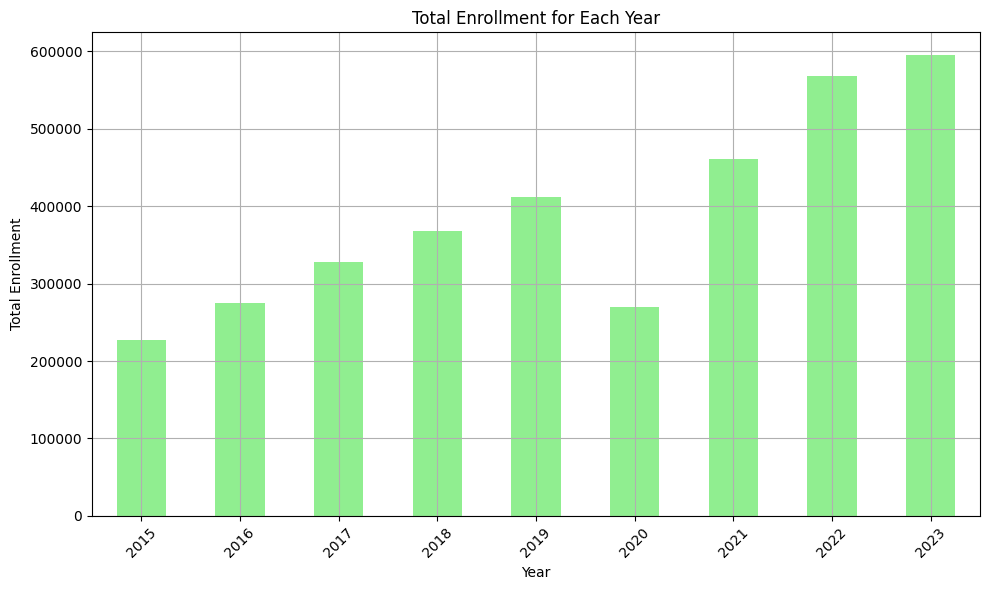

In [18]:
# Calculate the total enrollment for each year
total_enrollment_by_year = data.drop(columns='Country of Citizenship').sum()

# Define a color for the bars
bar_color = 'lightgreen'

# Plot total enrollment for each year using pandas plot method
total_enrollment_by_year.plot(kind='bar', figsize=(10, 6), color=bar_color)
plt.title('Total Enrollment for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()